# Homework1- Visualizing textual data
HDS - Napong Leelasithorn - 61070505228

tasks<br>
1. Find the top 10 word bigram from UN General Debates of 
years 1970 – 1990 and compare with those of years 1990 – the latest (remove stopwords first)
2. Create a bigram word cloud of the UN General Debates 
dataset of years 1970 – 1990 and 1990 to the latest (remove 
stopwords first)
3. Create a trend graph showing the bigram and word trend of 
“climate change”, “global warming”, “wars” and 3 others 
of your choices

In [1]:
import pandas as pd
import regex as re
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Load the data

In [2]:
undeb = pd.read_csv('un-general-debates-blueprint.csv.gz')
undeb

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...


## transform text column to lowercase

In [3]:
undeb['text'] = undeb['text'].str.lower()
undeb

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: may i first convey to our president the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : it is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t it is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t may i begin by expressing to ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. no doubt each of us, before coming up to ..."
...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,on behalf of the people and the government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nseventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,i should like to congratulate the president an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,i would like to begin by thanking the secretar...


## 1. Find the top 10 word bigram from UN General Debates of years 1970 – 1990 and compare with those of years 1990 – the latest (remove stopwords first)

### tokenize function

In [4]:
def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

### tokenizing our data

In [5]:
undeb['tokens'] = undeb['text'].apply(tokenize)
undeb

,session,year,country,country_name,speaker,position,text,tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: may i first convey to our president the co...,"[may, i, first, convey, to, our, president, th..."
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : it is a fortunate coincidence that pr...,"[it, is, a, fortunate, coincidence, that, prec..."
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t it is a pleasure for me to extend to y...,"[it, is, a, pleasure, for, me, to, extend, to,..."
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t may i begin by expressing to ambassado...,"[may, i, begin, by, expressing, to, ambassador..."
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. no doubt each of us, before coming up to ...","[no, doubt, each, of, us, before, coming, up, ..."
...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,on behalf of the people and the government of ...,"[on, behalf, of, the, people, and, the, govern..."
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nseventy years have passed since the establis...,"[seventy, years, have, passed, since, the, est..."
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,i should like to congratulate the president an...,"[i, should, like, to, congratulate, the, presi..."
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,i would like to begin by thanking the secretar...,"[i, would, like, to, begin, by, thanking, the,..."


### 1.1 data from 1970-1990, 1990-latest 

In [6]:
undeb = undeb[['year', 'country', 'tokens']]
un1970_90 = undeb[(undeb['year'] >= 1970) & (undeb['year'] <= 1990)]
un1990 = undeb[undeb['year'] >= 1990]
un1990

,year,country,tokens
2730,1990,AFG,"[allow, me, first, of, all, sir, to, congratul..."
2731,1990,AGO,"[first, i, would, like, to, congratulate, you,..."
2732,1990,ALB,"[it, is, a, special, pleasure, for, me, to, sp..."
2733,1990,ARE,"[mr, president, on, behalf, of, the, delegatio..."
2734,1990,ARG,"[at, the, outset, let, me, convey, to, you, si..."
...,...,...,...
7502,2015,YEM,"[on, behalf, of, the, people, and, the, govern..."
7503,2015,YUG,"[seventy, years, have, passed, since, the, est..."
7504,2015,ZAF,"[i, should, like, to, congratulate, the, presi..."
7505,2015,ZMB,"[i, would, like, to, begin, by, thanking, the,..."


### n-grams function

In [7]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t.lower() in stopwords])==0] # added t.lower() to this line

### using stopwords from NLTK

In [8]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [9]:
stopwords.add('would')

** Previously, I'd seen <b>"would like"</b> in the result after running the bigram word count. So, I decided to add "would" in the stopwords set we created using nltk. **

In [10]:
#stopwords

### 1.2 create bigram

In [11]:
un1970_90['bigram'] = un1970_90['tokens'].apply(lambda x: ngrams(x, stopwords = stopwords))
un1990['bigram'] = un1990['tokens'].apply(lambda x: ngrams(x, stopwords = stopwords))
un1990

<ipython-input-11-57296fbd3d9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un1970_90['bigram'] = un1970_90['tokens'].apply(lambda x: ngrams(x, stopwords = stopwords))
<ipython-input-11-57296fbd3d9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  un1990['bigram'] = un1990['tokens'].apply(lambda x: ngrams(x, stopwords = stopwords))


,year,country,tokens,bigram
2730,1990,AFG,"[allow, me, first, of, all, sir, to, congratul...","[unanimous election, high post, general assemb..."
2731,1990,AGO,"[first, i, would, like, to, congratulate, you,...","[general assembly, forty-fifth session, succes..."
2732,1990,ALB,"[it, is, a, special, pleasure, for, me, to, sp...","[special pleasure, general assembly, also mark..."
2733,1990,ARE,"[mr, president, on, behalf, of, the, delegatio...","[mr president, united arab, arab emirates, gre..."
2734,1990,ARG,"[at, the, outset, let, me, convey, to, you, si...","[outset let, heartfelt congratulations, genera..."
...,...,...,...,...
7502,2015,YEM,"[on, behalf, of, the, people, and, the, govern...","[general assembly, seventieth session, every s..."
7503,2015,YUG,"[seventy, years, have, passed, since, the, est...","[seventy years, passed since, united nations, ..."
7504,2015,ZAF,"[i, should, like, to, congratulate, the, presi...","[country denmark, general assembly, seventieth..."
7505,2015,ZMB,"[i, would, like, to, begin, by, thanking, the,...","[important session, seventieth anniversary, un..."


### word counting function

In [12]:
def count_words(df, column='tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

### 1.3 apply word counting function to both df(s) (1970-1990 and 1990-latest year)

<u>Top 10 Words of the 1970s-1990s (20 years) UN general debates</u>

In [13]:
freqdic1970 = count_words(un1970_90, column = 'bigram')
freqdic1970.head(10)

,freq
token,
united nations,43840
general assembly,13913
developing countries,11987
international community,11506
south africa,9295
united states,7718
middle east,7608
security council,7498
human rights,6565


<u>Top 10 Words of the 1990s-2015s (25 years) UN general debates</u>

In [14]:
freqdic1990 = count_words(un1990, column = 'bigram')
freqdic1990.head(10)

,freq
token,
united nations,61526
international community,16924
security council,14031
general assembly,13691
human rights,13654
developing countries,7023
member states,6037
sustainable development,5277
climate change,5158


In both dataframes, "United Nations" is the bigram that stands prominently at the top of the list, and there's no surprise to speak this words in "UN General Debates". Basically, the top bigram words which differ from another dataframe are usually considered to be the most meaningful words, "South Affrica" was mentioned significantly in 1970s-1990s era and "SDG" in 1990-2015. Presumely, the Cold War that take place in 1947-1991 which made the main difference. So, we constructing the word clouds below to get more insights. 

## 2. Create a bigram word cloud of the UN General Debates dataset of years 1970 – 1990 and 1990 to the latest (remove stopwords first)

### word cloud framework

In [15]:
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

### 2.1 Word Cloud of UN general debates

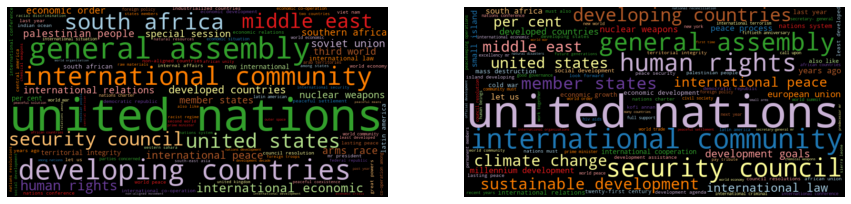

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(121)
wordcloud(freqdic1970['freq'], max_words=100)
plt.subplot(122)
wordcloud(freqdic1990['freq'], max_words=100)

From the word clouds above, like I said, the main difference in these two is something about Cold War (As you can see "Soviet Union" only in 1970s-1990s). 

### 2.2 Word cloud of UN general debates (exclude top 50 list).

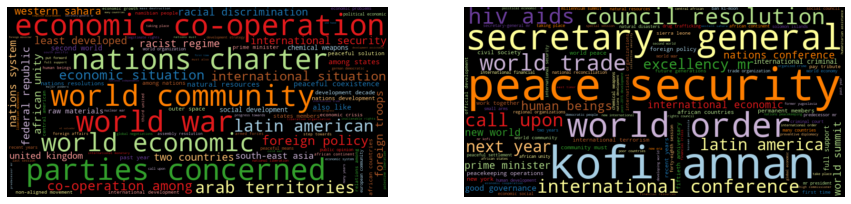

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(121)
wordcloud(freqdic1970['freq'], max_words=100, stopwords=freqdic1970.head(50).index)
plt.subplot(122)
wordcloud(freqdic1990['freq'], max_words=100, stopwords=freqdic1990.head(50).index)

<br><br><br>
## 3. Create a trend graph showing the bigram and word trend of “climate change”, “global warming”, “wars” and 3 others of your choices 

### count keywords function

In [18]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [19]:
def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

### 3.1 transform the whole tokens to bigrams

In [20]:
undeb['bigram'] = undeb['tokens'].apply(lambda x: ngrams(x, stopwords = stopwords))
undeb

<ipython-input-20-34ed4f82d5b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  undeb['bigram'] = undeb['tokens'].apply(lambda x: ngrams(x, stopwords = stopwords))


,year,country,tokens,bigram
0,1970,ALB,"[may, i, first, convey, to, our, president, th...","[first convey, albanian delegation, twenty-fif..."
1,1970,ARG,"[it, is, a, fortunate, coincidence, that, prec...","[fortunate coincidence, united nations, first ..."
2,1970,AUS,"[it, is, a, pleasure, for, me, to, extend, to,...","[mr president, warmest congratulations, austra..."
3,1970,AUT,"[may, i, begin, by, expressing, to, ambassador...","[ambassador hambro, best wishes, general assem..."
4,1970,BEL,"[no, doubt, each, of, us, before, coming, up, ...","[rostrum wonders, speech must, still speak, mo..."
...,...,...,...,...
7502,2015,YEM,"[on, behalf, of, the, people, and, the, govern...","[general assembly, seventieth session, every s..."
7503,2015,YUG,"[seventy, years, have, passed, since, the, est...","[seventy years, passed since, united nations, ..."
7504,2015,ZAF,"[i, should, like, to, congratulate, the, presi...","[country denmark, general assembly, seventieth..."
7505,2015,ZMB,"[i, would, like, to, begin, by, thanking, the,...","[important session, seventieth anniversary, un..."


### 3.2 create the list of keywords which contain [climate change, global warming, wars] + [thailand, north korea, nuclear disarmament]

In [21]:
keywords = ['wars', 'thailand']
keybigrams = ['climate change', 'global warming', 'nuclear disarmament', 'north korea']

### 3.3 count each word separately

In [22]:
freq_df = count_keywords_by(undeb, by='year', keywords=keywords)
freq_df1 = count_keywords_by(undeb, by='year', keywords=keybigrams, column = 'bigram')

### 3.4 concatenation

In [23]:
final_freq_df = pd.concat([freq_df, freq_df1], axis = 1)
final_freq_df

,wars,thailand,climate change,global warming,nuclear disarmament,north korea
year,,,,,,
1970,38,10,0,0,7,1
1971,85,12,0,0,23,4
1972,88,13,0,0,14,18
1973,72,12,0,0,11,5
1974,70,20,0,0,10,3
1975,54,19,0,0,32,13
1976,55,5,0,0,29,3
1977,36,30,0,0,37,2
1978,67,19,0,0,41,1


### 3.5 Trend Graph 

<AxesSubplot:xlabel='year'>

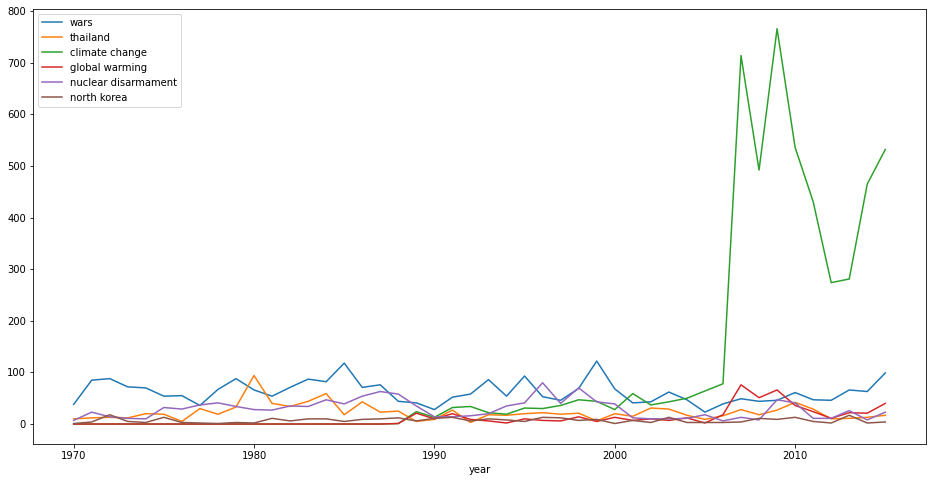

In [24]:
final_freq_df.plot(kind='line', figsize=(16,8))

The line chart shows that the number of climate change concerned is rapidly increasing from < 100 to approximately 750 between 2005 and 2010. <br>
The word "Thailand" peaked in 1980 in the United Nations general debate. This may be caused by clashes between the Communists and the Thai Army. (คำสั่งสำนักนายกรัฐมนตรีที่ 66/2523)
for the other words in the chart, its trend is quite stable, so it doesn't need to be described.